In [1]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
sys.path.append('/Users/clairewilliams/Research/Calculations/model-timescales/src')

from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


In [2]:
masses_array   = np.logspace(4, 8, 10) * u.Msun
radii_array    = np.logspace(-0.7, 2, 10) * u.pc
velocity_array = np.logspace(-0.7, 2.2, 10) * u.km/u.s

grid = build_bulk_energy_grid(masses_array, radii_array, velocity_array,
                              alpha=3/5, energy_unit=u.erg)


# Example: access aligned arrays
M = grid['M']   # Msun
R = grid['R']   # pc
V = grid['V']   # km/s
K = grid['K']   # erg
U = grid['U']   # erg

print(len(M), len(R), len(V), len(K), len(U))  # -> 1_000_000 each (100*100*100


167 167 167 167 167


In [6]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law")

In [5]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={'M_bh':1e6 *u.Msun})

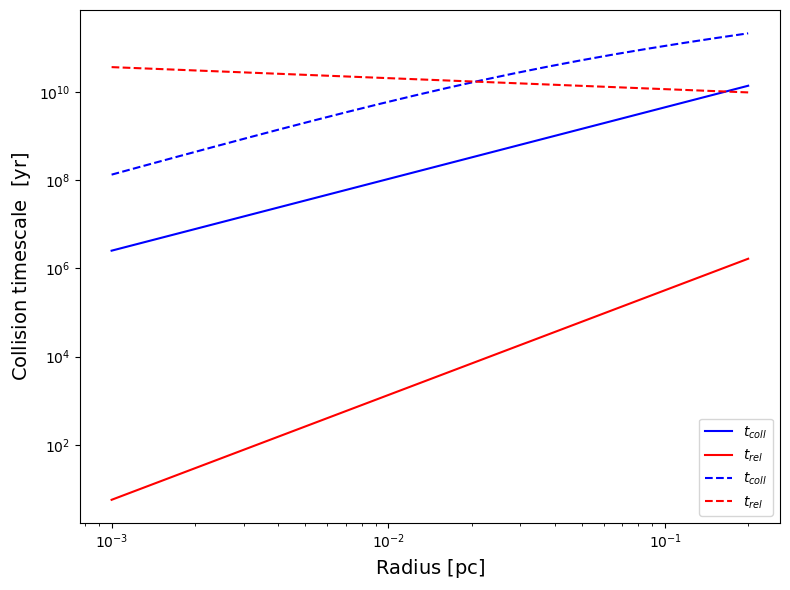

In [9]:
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

fig, ax = plt.subplots(figsize=(8, 6))


ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')
xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue",linestyle = "dashed", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",linestyle = "dashed",label = r"$t_{rel}$")
ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

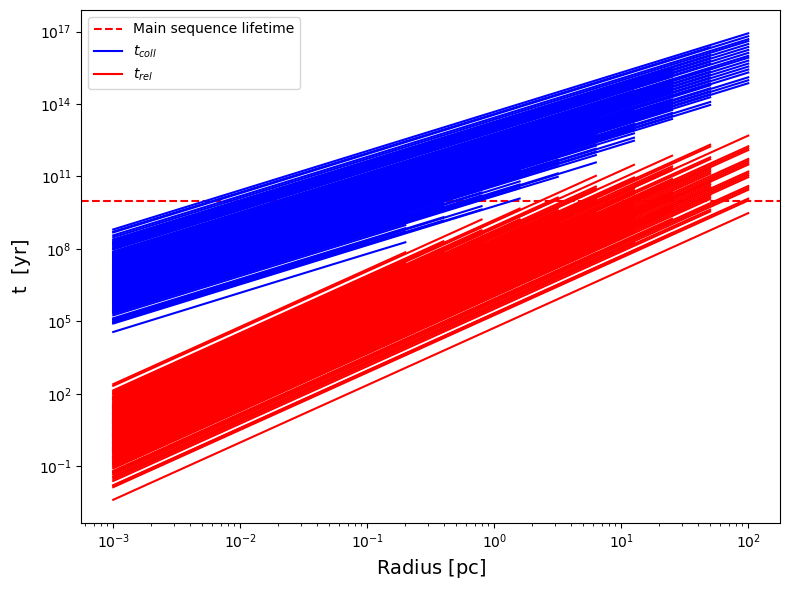

In [10]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(model1.Nsystems):
    t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

    t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

    xaxis = model1.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

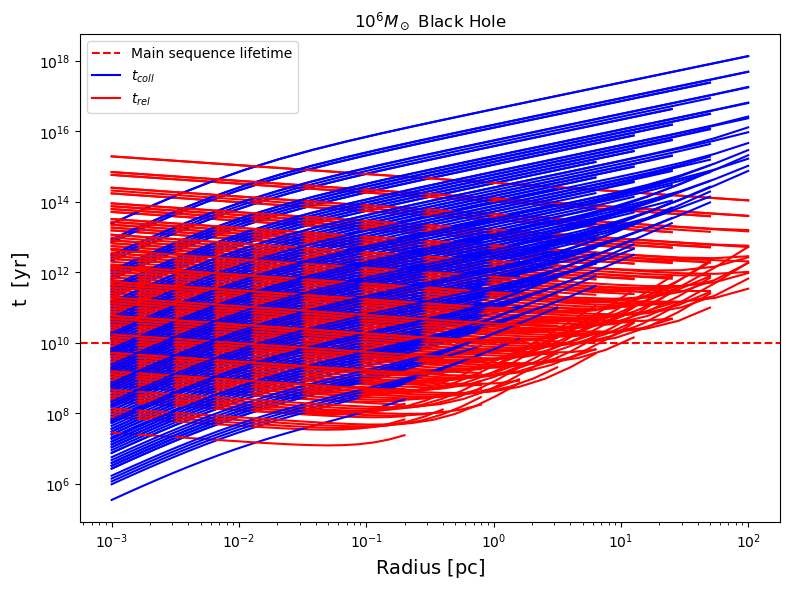

In [13]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^6 M_\odot$ Black Hole")
plt.legend()
plt.tight_layout()
plt.show()

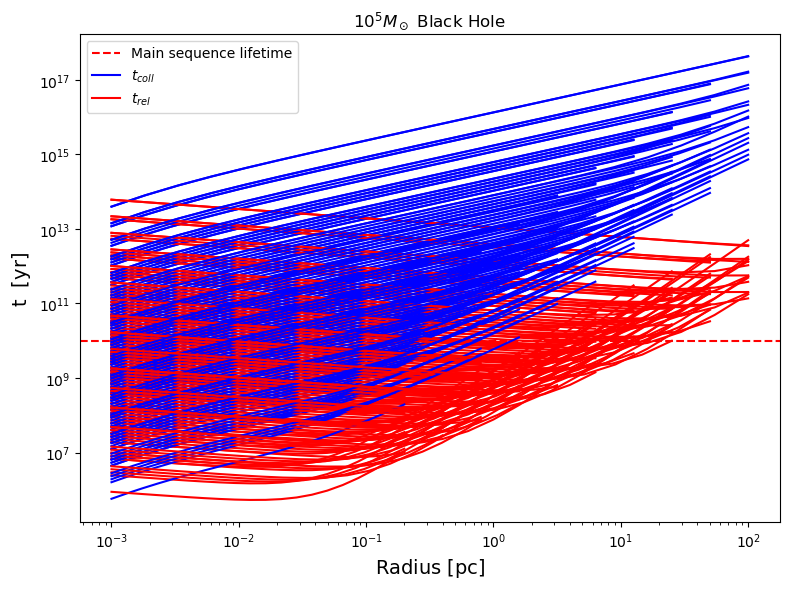

In [14]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={'M_bh':1e5 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^5 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

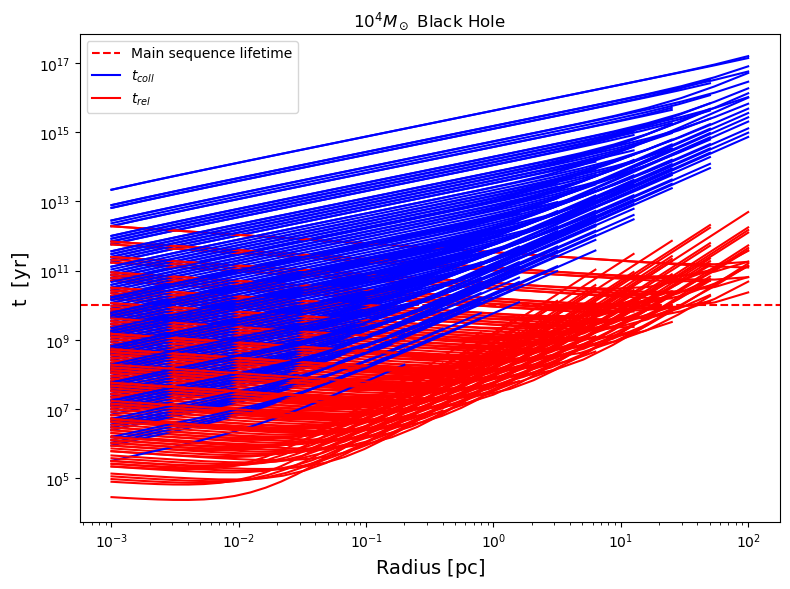

In [15]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={'M_bh':1e4 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^4 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

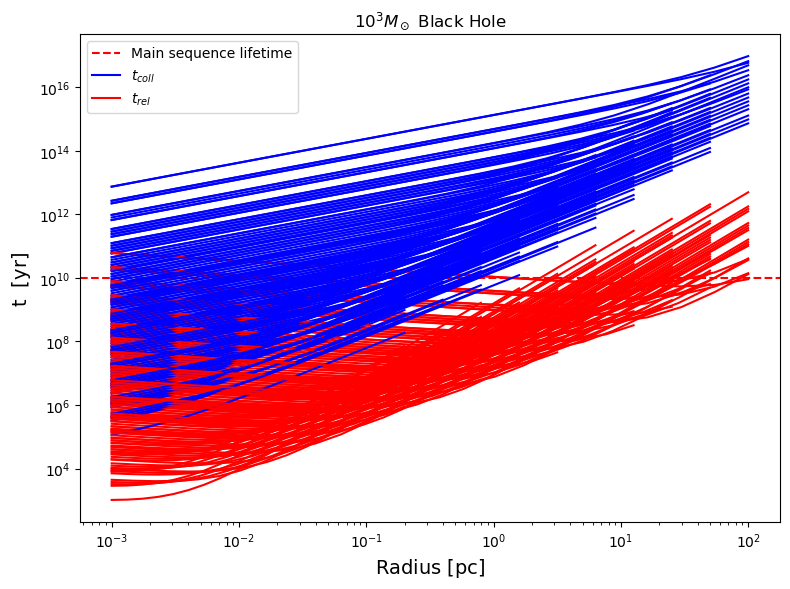

In [16]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={'M_bh':1e3 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^3 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

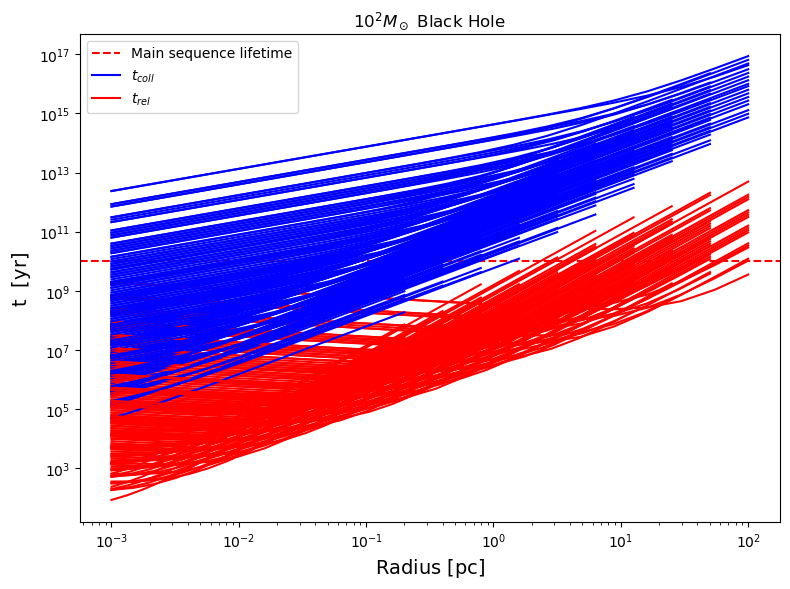

In [17]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh", profile_kwargs={'M_bh':1e2 *u.Msun})
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

xaxis = modelbh.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(modelbh.Nsystems):
    t_coll = collision_timescale(modelbh.n[system_id], modelbh.sigma[system_id], modelbh.Mstar, e =0.9, alpha = modelbh.alpha).to('yr')

    t_relax = relaxation_timescale(modelbh.sigma[system_id], modelbh.rho[system_id],modelbh.Mstar).to('yr')

    xaxis = modelbh.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)
plt.title(r"$10^2 M_\odot$ Black Hole")

plt.legend()
plt.tight_layout()
plt.show()

In [110]:
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={'M_bh':1e6 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')


Using ensemble value of Mstar: 1.0 solMass


In [111]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,702009630.4892495 yr,36127938289.120735 yr,2.238357933549516,1.0,51.46359354634807,0.2767940954718503,14.244818825392366,t_coll,10000000000.0 yr
1,0,0.0011141374574404601 pc,832368798.9233695 yr,35164830143.97913 yr,2.120606853887512,1.0,42.246694241138314,0.28437504060323704,12.01390539017625,t_coll,10000000000.0 yr
2,0,0.0012413022740718933 pc,985220469.5445329 yr,34227397438.13235 yr,2.0090502013562874,1.0,34.74085090208861,0.292163610104317,10.150012417650029,t_coll,10000000000.0 yr
3,0,0.001382981359549522 pc,1163975164.2558908 yr,33314955805.59781 yr,1.9033621130265648,1.0,28.62170674139382,0.30016548898797374,8.59124859970086,t_coll,10000000000.0 yr
4,0,0.0015408313356160552 pc,1372441949.1895652 yr,32426839141.878006 yr,1.803233868521249,1.0,23.627111631953717,0.30838651760804486,7.286282677314736,t_coll,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
8345,166,39.06939937054621 pc,162150780529960.7 yr,241789679141.7293 yr,0.02952539769238776,0.0,0.0014911410130218504,0.041358258282556064,6.167099515226998e-05,t_ms,10000000000.0 yr
8346,166,49.417133613238384 pc,231547170783781.38 yr,391425004327.75586 yr,0.03143516068322428,0.0,0.0016904762990745774,0.025547678072263873,4.3187744277549366e-05,t_ms,10000000000.0 yr
8347,166,62.50551925273976 pc,333232108855516.25 yr,648729106608.948 yr,0.033731600705921336,0.0,0.0019467785047395474,0.01541475463043771,3.000911297037054e-05,t_ms,10000000000.0 yr
8348,166,79.06043210907701 pc,482239262619274.75 yr,1093331576187.0547 yr,0.036398440757837255,0.0,0.0022671973456674637,0.009146356162944232,2.0736594415156415e-05,t_ms,10000000000.0 yr


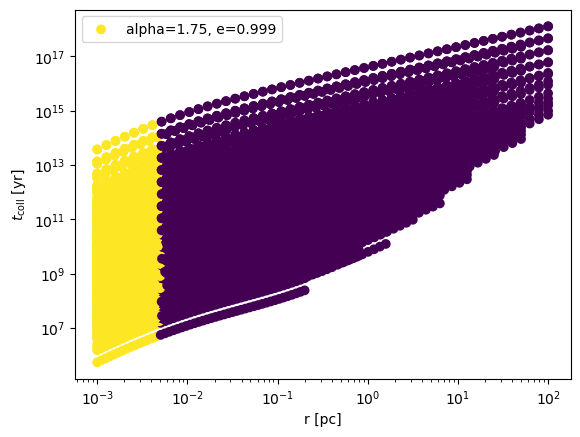

In [112]:
# from astropy import units as u

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = table5['massloss']
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.scatter(r, t,c = c, label="alpha=1.75, e=0.999")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
ax.legend()

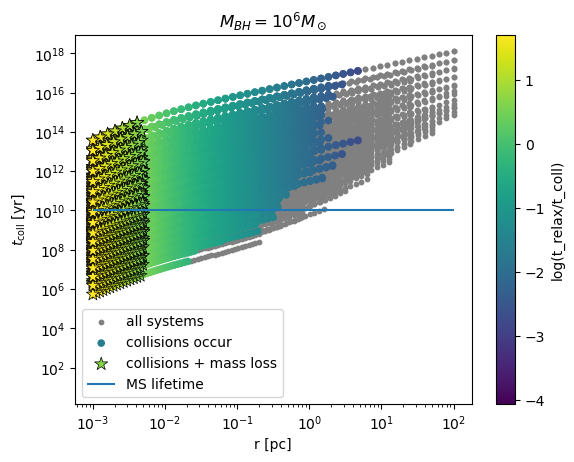

In [113]:
# from astropy import units as u

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0)[0]
# # im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
yescolidx = np.invert(nocolidx)
masslossidx = np.where(ml[yescolidx]==1)[0]
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^6 M_\odot$")
ax.legend()

Using ensemble value of Mstar: 1.0 solMass


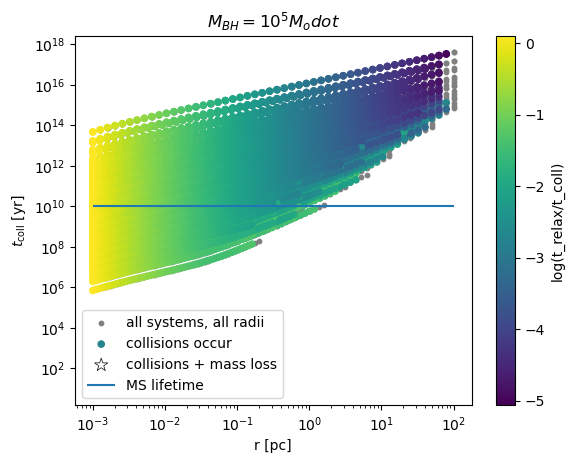

In [116]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={'M_bh':1e5 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0)[0]
# # im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
yescolidx = np.invert(nocolidx)
masslossidx = np.where(ml[yescolidx]==1)[0]
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^5 M_odot$")
ax.legend()

Using ensemble value of Mstar: 1.0 solMass


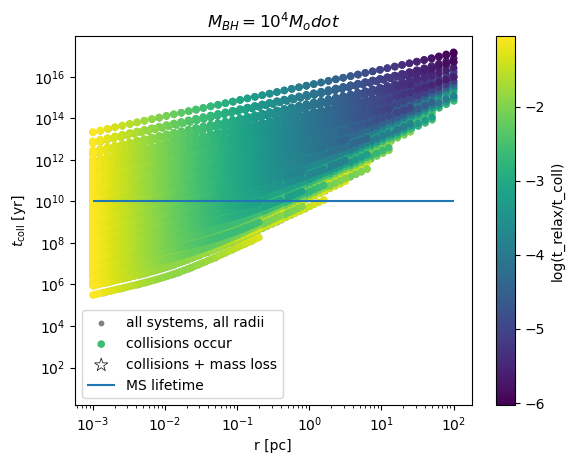

In [117]:
# from astropy import units as u
modelbh = TimescaleEnsemble(grid, densityModel="power-law-bh",Nsampling=50, profile_kwargs={'M_bh':1e4 *u.Msun})
table5 = generate_timescale_comparison(modelbh, as_ = 'pandas')

r = u.Quantity(table5['r']).to_value(u.pc)      # plain floats in chosen units
t = u.Quantity(table5['t_coll']).to_value(u.yr)
c = np.log10(np.array(u.Quantity(table5['t_relax/t_coll']).value))
ml = np.array(u.Quantity(table5['massloss']).value)
vmin =min(c)
vmax = max(c)
nocolidx = np.where(c<0)[0]
# # im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
yescolidx = np.invert(nocolidx)
masslossidx = np.where(ml[yescolidx]==1)[0]
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", s=10,label="all systems, all radii")

im = ax.scatter(r[yescolidx], t[yescolidx],c = c[yescolidx],vmin= vmin,vmax = vmax,s=20, label="collisions occur")
im = ax.scatter(r[yescolidx][masslossidx], t[yescolidx][masslossidx],
            marker = "*",c = c[yescolidx][masslossidx],edgecolor = "black",
            linewidth = 0.5,vmin= vmin,vmax = vmax,s=100, label="collisions + mass loss")

plt.colorbar(im,label='log(t_relax/t_coll)', orientation='vertical')
# im = ax.scatter(r[nocolidx], t[nocolidx],color = "grey", label="alpha=1.75, e=0.999")
ax.hlines(1e10,xmin=1e-3,xmax=1e2, label= "MS lifetime")
ax.set_xlabel("r [pc]")
ax.set_ylabel(r"$t_{\mathrm{coll}}$ [yr]")
plt.title(r"$M_{BH}=10^4 M_odot$")
ax.legend()